<font color='blue' size=6><b>Demo - Week 3 Worksheet Suggested Solutions</b></font> 

<font size=3 color='blue'>

We must first read in the two data files hr130 and hrstudy 
</font>    

In [1]:
install.packages('datasets',repos='https://cran.ma.imperial.ac.uk/')
library(datasets)

Warning message:
"package 'datasets' is not available (for R version 3.6.1)"Warning message:
"package 'datasets' is a base package, and should not be updated"

In [2]:
library(help = "datasets")

In [3]:
getwd()
#### "T" is a shortcut for "TRUE", and "F" for "FALSE"

hr130<-read.table(file="../Data/hr130.txt",sep=',',header = T)

hrstudy<-read.table(file="../Data/hrstudy.txt",sep=',',header = T)

[1] "C:/Users/smaap2/Dropbox/MAT022-Foundations-of-Statistics-and-Data-Science/labsolutions"

 <font size=5 color='blue'><b> Suggested solutions to Part 1 (data file hr130) </b></font>    

<font size=3 color='blue'> Question 1: Plot a histogram of data hr130 </font>    

In [5]:
heartrate <- hr130$hr ### $hr removes the header so we can plot numeric values
heartrate

[1] 70 69 71 62 75 74 80 73 75 82 64 66 68 69 72 78 70 68 57 70 75 74 69 73 61
 [26] 77 84 61 58 73 65 74 77 62 71 76 72 68 69 79 78 71 74 67 64 78 76 87 78 73
 [51] 89 73 67 81 66 64 71 72 73 64 65 73 69 57 86 72 79 78 80 68 70 82 84 79 81
 [76] 73 74 84 68 71 83 77 78 83 66 70 82 82 85 86 77 73 78 72 79 59 64 65 82 78
[101] 81 78 64 70 83 89 69 73 84 80 76 75 79 81 79 81 71 80 74 83 77 66 63 68 70
[126] 77 75 79 78 77

In [6]:
head(hr130, n=6)       ### first 6 entries of the dataset, n=6 is the default value, can pick any value
length(heartrate)  ### length of the column (amount of data that we have)
summary(heartrate)    ### summary of all data

hr
70
69
71
62
75
74


[1] 130

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  57.00   69.00   74.00   73.76   79.00   89.00 

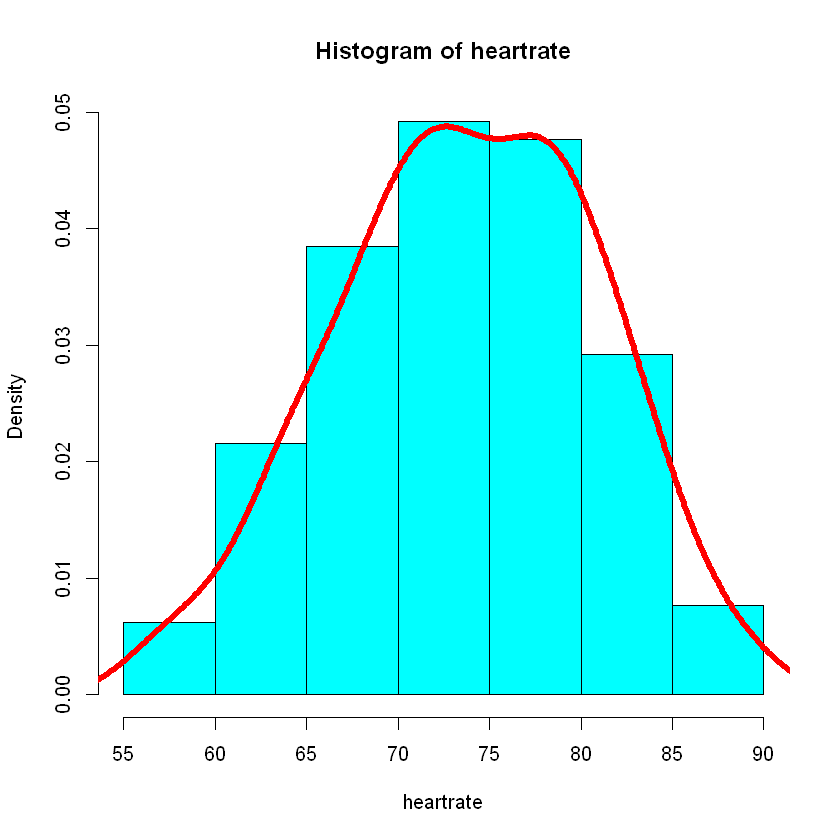

In [7]:
hist(heartrate, freq=FALSE, col='cyan') ### plots histogram
lines(density(heartrate),col='red',lwd=5) ### plots red line

<font size=3 color='blue'>  Question 2: Compute the sample mean and sample variance of the heart rate  </font>  

In [8]:
xbar<-mean(heartrate) ; sprintf('sample mean: %f',xbar) ### print sample mean
s2<-var(heartrate)  ; sprintf('sample variance: %f',s2) ### print sample variance

[1] "sample mean: 73.761538"

[1] "sample variance: 49.872928"

<font size=5 color='blue'><b> Suggested Solutions to Part 2 (data file hrstudy) </b></font>

In [13]:
head(hrstudy)
length(hrstudy[[1]])  ### length of first column of hrstudy, ie number of rows of data

GENDER,AGE,DIET,WEIGHT
male,22,moderate,55
male,20,poor,87
female,22,poor,78
male,21,moderate,68
female,20,moderate,63
male,18,poor,43


[1] 100

In [14]:
summary(hrstudy) ### of all the data (not just first 6 rows)

    GENDER        AGE              DIET        WEIGHT     
 female:47   Min.   :18.00   good    :32   Min.   :33.00  
 male  :53   1st Qu.:19.00   moderate:32   1st Qu.:56.00  
             Median :20.00   poor    :36   Median :66.50  
             Mean   :20.18                 Mean   :65.26  
             3rd Qu.:21.25                 3rd Qu.:74.00  
             Max.   :27.00                 Max.   :91.00  

<font size=3 color='blue'> Question 1: Assign appropriate levels of measurement to each variable. </font>

In [15]:
gender <- hrstudy[[1]]

In [16]:
age <- hrstudy[[2]]

In [32]:
diet <- hrstudy[[3]]

In [33]:
weight <- hrstudy[[4]]

<font size=3 color='blue'> Question 2: Draw a pie chart to illustrate the proportion of participants in each diet category. </font>

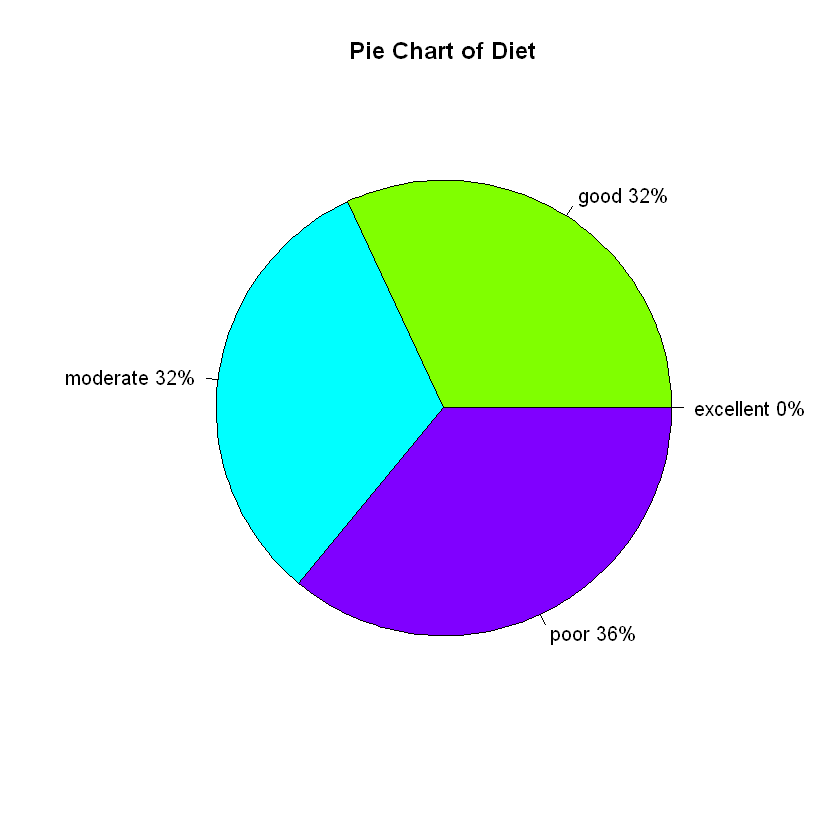

In [37]:
# Pie Chart with Percentages
slices <- c(sum(diet=="excellent"), sum(diet=="good"), sum(diet=="moderate"), sum(diet=="poor")) 
lbls <- c('excellent', 'good', 'moderate', 'poor')
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct)       # add percents to labels 
lbls <- paste(lbls,"%",sep="") # ad % to labels 
pie(slices,labels = lbls, col=rainbow(length(lbls)),
   main="Pie Chart of Diet")

<font size=3 color='blue'> Question 3: Draw a histogram to illustrate the age distribution of the participants </font>

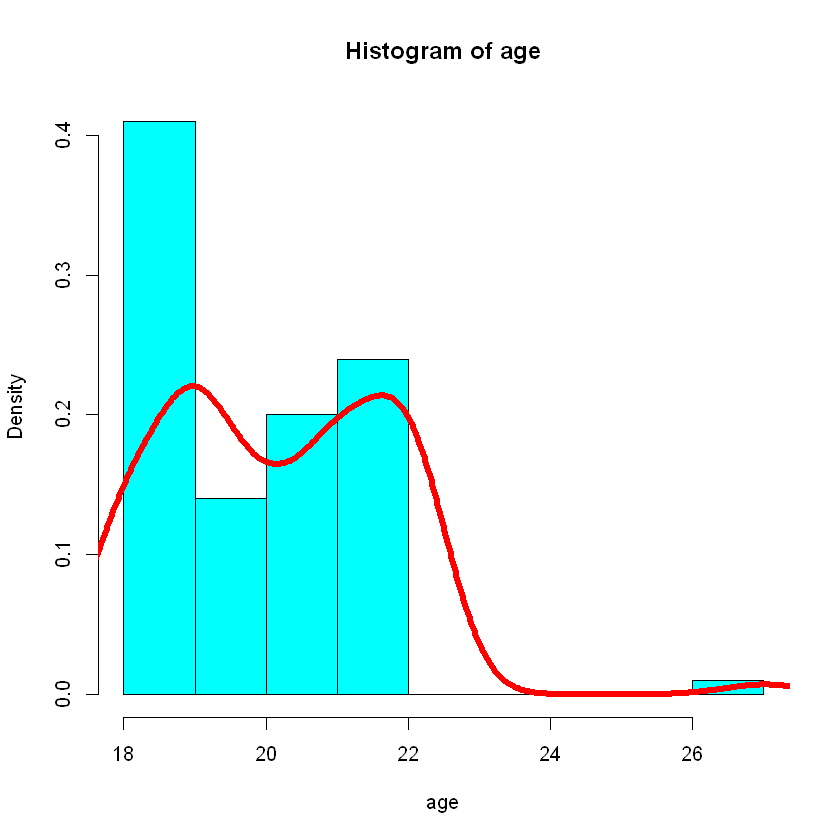

In [38]:
hist(age, freq=FALSE, col="cyan")
lines(density(age),col='red',lwd=5)

<font size=3 color='blue'> Question 4: Draw a bar chart to illustrate the relative proportion of participants in each diet. </font>

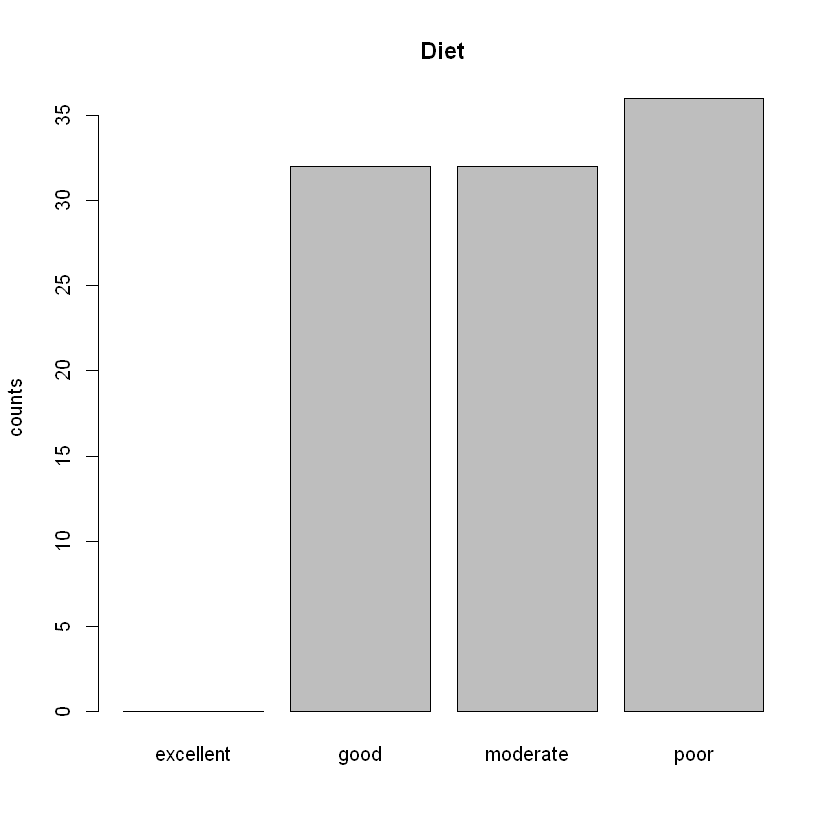

In [49]:
### barplot fror Diet
counts<-c(sum(diet=="excellent"), sum(diet=="good"), sum(diet=="moderate"), sum(diet=="poor"))
barplot(counts, main='Diet', horiz=F, names.arg=c('excellent', 'good', 'moderate', 'poor'),ylab='counts')

<font size=3 color='blue'> Question 5: Draw a clustered bar chart to group the participants according to diet and gender. </font>

In [51]:
### Stacked barplot
countsmale<-c(sum( (diet=="excellent") & (gender=="male") ), 
               sum( (diet=="good") & (gender=="male") ),
               sum( (diet=="moderate") & (gender=="male") ),
               sum( (diet=="poor") & (gender=="male") ))
    
countsfemale<-c(sum( (diet=="excellent") & (gender=="female") ), 
                 sum( (diet=="good") & (gender=="female") ),
                 sum( (diet=="moderate") & (gender=="female") ),
                 sum( (diet=="poor") & (gender=="female") ))

StCounts<-rbind(countsfemale,countsmale)

StCounts

countsfemale,0,19,13,15
countsmale,0,13,19,21


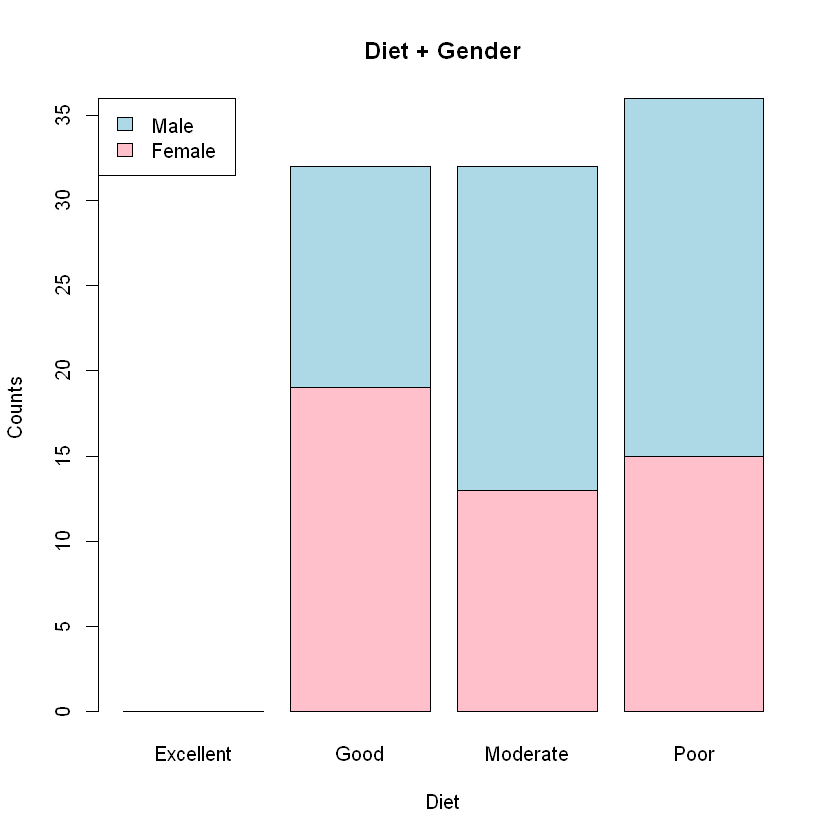

In [60]:
barplot(StCounts, horiz=F, names.arg=c('Excellent', 'Good', 'Moderate', 'Poor'), ylab='Counts',  
        main='Diet + Gender', xlab='Diet', col=c('pink','lightblue'), 
        legend.text = c('Female','Male'),
        args.legend = list(x = "topleft",col=c('pink','lightblue')))

<font size=3 color='blue'> Question 6: Draw a box-plot of the age distribution in each diet category and make a note of any
outliers. </font>

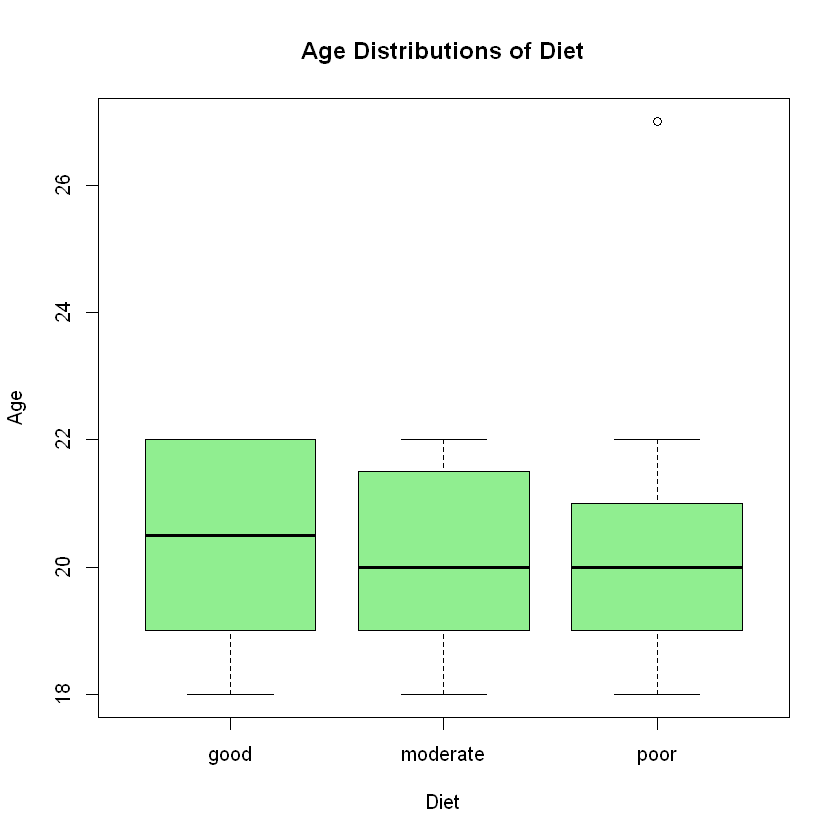

In [62]:
boxplot(age~diet,xlab='Diet',names.arg=c('Excellent', 'Good', 'Moderate', 'Poor'), ylab='Age',
        col='lightgreen', main='Age Distributions of Diet')